In [1]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
na_values = ['na']
data_fbref = pd.read_csv('./tm_ok.csv', sep=',',na_values=na_values)
data_fbref = data_fbref.loc[data_fbref["League Name"]!='Champions-League']
data_fbref = data_fbref.loc[data_fbref["League Name"]!='Europa-League']
data_fbref = data_fbref.loc[(data_fbref["position"]=='Defender - Centre-Back ') | (data_fbref["position"]=='Defender - Right-Back') | \
                          (data_fbref["position"]=='Defender - Left-Back')]
data_fbref

Unnamed: 0             Player  Nation    Pos       Squad  Age    Born  \
17            21       Andreas Beck  de GER  DF,MF   Stuttgart   30  1987.0   
33            39    Bastian Oczipka  de GER  DF,MF  Schalke 04   28  1989.0   
34            40  Benjamin Henrichs  de GER     DF  Leverkusen   20  1997.0   
35            42    Benjamin Pavard  fr FRA     DF   Stuttgart   21  1996.0   
37            44      Benno Schmitz  de GER     DF  RB Leipzig   22  1994.0   
...          ...                ...     ...    ...         ...  ...     ...   
8650       18714     Theo Hernández  fr FRA     DF       Milan   22  1997.0   
8651       18715     Thomas Ouwejan  nl NED     DF     Udinese   23  1996.0   
8655       18720    Tommaso Augello  it ITA     DF   Sampdoria   25  1994.0   
8663       18729       Vasco Regini  it ITA     DF   Sampdoria   29  1990.0   
8674       18742     Wilfried Singo  ci CIV     DF      Torino   19  2000.0   

      MP  Starts     Min   90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls/90  \
17    23      22  1927.0  21.4    1    1     1   0      0     5     0    0.05   
33    29      26  2320.0  25.8    0    2     0   0      0     2     0    0.00   
34    23      11  1268.0  14.1    0    1     0   0      0     1     1    0.00   
35    34      34  3060.0  34.0    1    0     1   0      0     2     0    0.03   
37     2       1    82.0   0.9    0    0     0   0      0     0     0    0.00   
...   ..     ...     ...   ...  ...  ...   ...  ..    ...   ...   ...     ...   
8650  33      33  2933.0  32.6    7    5     7   0      0     9     0    0.21   
8651  15       3   413.0   4.6    0    2     0   0      0     0     0    0.00   
8655  37      37  3216.0  35.7    1    3     1   0      0     2     1    0.03   
8663   3       1    88.0   1.0    0    0     0   0      0     0     0    0.00   
8674  28      20  1854.0  20.6    1    2     1   0      0     4     1    0.05   

      Ast/90   G+A  G-PK/90  G+A-PK   xG  npxG   xA  npxG+xA  xG/90  xA/90  \
17      0.05  0.09     0.05    0.09  0.3   0.3  1.5      1.7   0.01   0.07   
33      0.08  0.08     0.00    0.08  0.7   0.7  3.6      4.3   0.03   0.14   
34      0.07  0.07     0.00    0.07  0.8   0.8  1.6      2.5   0.06   0.12   
35      0.00  0.03     0.03    0.03  1.1   1.1  1.1      2.2   0.03   0.03   
37      0.00  0.00     0.00    0.00  0.0   0.0  0.1      0.1   0.00   0.09   
...      ...   ...      ...     ...  ...   ...  ...      ...    ...    ...   
8650    0.15  0.37     0.21    0.37  3.6   3.6  5.2      8.9   0.11   0.16   
8651    0.44  0.44     0.00    0.44  0.2   0.2  0.9      1.1   0.05   0.20   
8655    0.08  0.11     0.03    0.11  0.3   0.3  3.1      3.4   0.01   0.09   
8663    0.00  0.00     0.00    0.00  0.0   0.0  0.0      0.0   0.00   0.04   
8674    0.10  0.15     0.05    0.15  1.1   1.1  2.9      4.0   0.05   0.14   

      xG+xA  npxG/90  npxG+xA/90    Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT  \
17     0.08     0.01        0.08   7.0    3  42.9   0.33    0.14  0.14   0.33   
33     0.17     0.03        0.17  15.0    3  20.0   0.58    0.12  0.00   0.00   
34     0.17     0.06        0.17  20.0    3  15.0   1.42    0.21  0.00   0.00   
35     0.07     0.03        0.07  13.0    2  15.4   0.38    0.06  0.08   0.50   
37     0.09     0.00        0.09   0.0    0   NaN   0.00    0.00   NaN    NaN   
...     ...      ...         ...   ...  ...   ...    ...     ...   ...    ...   
8650   0.27     0.11        0.27  47.0   13  27.7   1.44    0.40  0.15   0.54   
8651   0.25     0.05        0.25   6.0    2  33.3   1.31    0.44  0.00   0.00   
8655   0.10     0.01        0.10   8.0    2  25.0   0.22    0.06  0.13   0.50   
8663   0.04     0.00        0.04   0.0    0   NaN   0.00    0.00   NaN    NaN   
8674   0.20     0.05        0.20  10.0    1  10.0   0.49    0.05  0.10   1.00   

      Dist   FK  npxG/Sh  G-xG  np:G-xG     Cmp     Att  Cmp%  TotDist  \
17    22.2  0.0     0.04   0.7      0.7   820.0  1161.0  70.6  16528.0   
33    26.1  1.0     0.05  

In [3]:
mycolumns = ['Player','90s','CrdY','CrdR','Gls/90','Ast/90','xG/90','xA/90','Sh/90','SoT/90','FK','Cmp','Att',\
             'TotDist','PrgDist','Cmp_short','Att_short','Cmp_medium','Att_medium','Cmp_long','Att_long','KP','1/3','PPA',\
             'CrsPA','Prog','SCA90','PassLive','PassDead','Drib','Fld','Def','GCA90','PassLive_AMB','PassDead_AMB','Drib_AMB',\
            'Fld_AMB','Def_AMB','Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl_dribble','Past','Succ','Def 3rd_pression', \
             'Mid 3rd_pression','Att 3rd_pression','Touches','Def Pen','Att Pen','Carries','CPA','Fls']

In [4]:
data_fbref_ok=data_fbref[mycolumns]
data_fbref_ok

Player   90s  CrdY  CrdR  Gls/90  Ast/90  xG/90  xA/90  \
17         Andreas Beck  21.4     5     0    0.05    0.05   0.01   0.07   
33      Bastian Oczipka  25.8     2     0    0.00    0.08   0.03   0.14   
34    Benjamin Henrichs  14.1     1     1    0.00    0.07   0.06   0.12   
35      Benjamin Pavard  34.0     2     0    0.03    0.00   0.03   0.03   
37        Benno Schmitz   0.9     0     0    0.00    0.00   0.00   0.09   
...                 ...   ...   ...   ...     ...     ...    ...    ...   
8650     Theo Hernández  32.6     9     0    0.21    0.15   0.11   0.16   
8651     Thomas Ouwejan   4.6     0     0    0.00    0.44   0.05   0.20   
8655    Tommaso Augello  35.7     2     1    0.03    0.08   0.01   0.09   
8663       Vasco Regini   1.0     0     0    0.00    0.00   0.00   0.04   
8674     Wilfried Singo  20.6     4     1    0.05    0.10   0.05   0.14   

      Sh/90  SoT/90   FK     Cmp     Att  TotDist  PrgDist  Cmp_short  \
17     0.33    0.14  0.0   820.0  1161.0  16528.0   6612.0      301.0   
33     0.58    0.12  1.0  1033.0  1422.0  19005.0   8372.0      427.0   
34     1.42    0.21  0.0   589.0   821.0  10214.0   4541.0      298.0   
35     0.38    0.06  0.0  1618.0  1932.0  33857.0  10984.0      528.0   
37     0.00    0.00  0.0    41.0    55.0    694.0    245.0       18.0   
...     ...     ...  ...     ...     ...      ...      ...        ...   
8650   1.44    0.40  2.0  1541.0  1897.0  26109.0   9702.0      767.0   
8651   1.31    0.44  0.0   161.0   256.0   3047.0   1125.0       67.0   
8655   0.22    0.06  0.0  1567.0  2046.0  27148.0  11188.0      708.0   
8663   0.00    0.00  0.0    33.0    37.0    603.0    284.0       13.0   
8674   0.49    0.05  0.0   736.0   959.0  12478.0   4526.0      358.0   

      Att_short  Cmp_medium  Att_medium  Cmp_long  Att_long    KP    1/3  \
17        374.0       383.0       502.0     133.0     238.0  12.0   62.0   
33        494.0       471.0       610.0     119.0     260.0  57.0   73.0   
34        358.0       225.0       313.0      61.0     114.0  13.0   47.0   
35        589.0       807.0       899.0     277.0     423.0   5.0  124.0   
37         23.0        18.0        24.0       4.0       7.0   2.0    1.0   
...         ...         ...         ...       ...       ...   ...    ...   
8650      866.0       616.0       722.0     132.0     229.0  39.0  106.0   
8651       90.0        64.0        88.0      26.0      59.0   9.0   12.0   
8655      791.0       704.0       879.0     132.0     288.0  29.0   91.0   
8663       14.0        15.0        17.0       3.0       4.0   1.0    2.0   
8674      398.0       308.0       398.0      60.0     122.0  23.0   34.0   

       PPA  CrsPA   Prog  SCA90  PassLive  PassDead  Drib   Fld  Def  GCA90  \
17    15.0    8.0   91.0   1.40      24.0       2.0   1.0   3.0  0.0   0.14   
33    30.0   14.0  132.0   3.49      45.0      38.0   2.0   1.0  1.0   0.19   
34    23.0    9.0   70.0   2.13      25.0       1.0   2.0   0.0  0.0   0.21   
35     7.0    0.0  101.0   0.53      17.0       0.0   0.0   0.0  0.0   0.00   
37     0.0    0.0    1.0   3.29       3.0       0.0   0.0   0.0  0.0   0.00   
...    ...    ...    ...    ...       ...       ...   ...   ...  ...    ...   
8650  46.0   10.0  160.0   2.42      57.0       5.0   3.0  11.0  1.0   0.37   
8651   5.0    2.0   15.0   3.49      11.0       3.0   0.0   1.0  1.0   0.65   
8655  41.0   19.0  165.0   1.37      44.0       2.0   2.0   0.0  0.0   0.11   
8663   1.0    1.0    2.0   1.02       1.0       0.0   0.0   0.0  0.0   0.00   
8674  21.0    9.0   66.0   1.89      30.0       1.0   3.0   4.0  0.0   0.19   

      PassLive_AMB  PassDead_AMB  Drib_AMB  Fld_AMB  Def_AMB   Tkl  TklW  \
17             2.0           1.0       0.0      0.0      0.0  43.0  25.0   
33             4.0           1.0       0.0      0.0      0.0  56.0  29.0   
34             2.0           0.0       1.0      0.0      0.0  39.0  22.0   
35             0.0           0.0       0.0      0.0      0.0  52.0  29.0 

In [5]:
liste_90 = ['CrdY','CrdR','FK','Cmp','Att',\
             'TotDist','PrgDist','Cmp_short','Att_short','Cmp_medium','Att_medium','Cmp_long','Att_long','KP','1/3','PPA',\
             'CrsPA','Prog','PassLive','PassDead','Drib','Fld','Def','PassLive_AMB','PassDead_AMB','Drib_AMB',\
            'Fld_AMB','Def_AMB','Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl_dribble','Past','Succ','Def 3rd_pression', \
             'Mid 3rd_pression','Att 3rd_pression','Touches','Def Pen','Att Pen','Carries','CPA','Fls']

In [6]:
data_fbref_ok_flt = data_fbref_ok.loc[data_fbref_ok['90s'] > 6]  

In [7]:
for i in liste_90:
    data_fbref_ok_flt[str(i)]=data_fbref_ok_flt[str(i)]/data_fbref_ok_flt['90s']
del data_fbref_ok_flt['90s']
data_fbref_ok_flt

Player      CrdY      CrdR  Gls/90  Ast/90  xG/90  xA/90  \
17         Andreas Beck  0.233645  0.000000    0.05    0.05   0.01   0.07   
33      Bastian Oczipka  0.077519  0.000000    0.00    0.08   0.03   0.14   
34    Benjamin Henrichs  0.070922  0.070922    0.00    0.07   0.06   0.12   
35      Benjamin Pavard  0.058824  0.000000    0.03    0.00   0.03   0.03   
39             Bernardo  0.133333  0.000000    0.07    0.07   0.04   0.06   
...                 ...       ...       ...     ...     ...    ...    ...   
8615            Rogério  0.191388  0.000000    0.00    0.05   0.03   0.07   
8634     Simone Bastoni  0.414201  0.000000    0.06    0.41   0.08   0.20   
8650     Theo Hernández  0.276074  0.000000    0.21    0.15   0.11   0.16   
8655    Tommaso Augello  0.056022  0.028011    0.03    0.08   0.01   0.09   
8674     Wilfried Singo  0.194175  0.048544    0.05    0.10   0.05   0.14   

      Sh/90  SoT/90        FK        Cmp        Att     TotDist     PrgDist  \
17     0.33    0.14  0.000000  38.317757  54.252336  772.336449  308.971963   
33     0.58    0.12  0.038760  40.038760  55.116279  736.627907  324.496124   
34     1.42    0.21  0.000000  41.773050  58.226950  724.397163  322.056738   
35     0.38    0.06  0.000000  47.588235  56.823529  995.794118  323.058824   
39     0.80    0.27  0.000000  44.133333  59.466667  750.066667  328.000000   
...     ...     ...       ...        ...        ...         ...         ...   
8615   0.77    0.14  0.000000  52.488038  61.913876  882.248804  253.588517   
8634   1.24    0.24  0.059172  47.751479  63.076923  888.343195  311.715976   
8650   1.44    0.40  0.061350  47.269939  58.190184  800.889571  297.607362   
8655   0.22    0.06  0.000000  43.893557  57.310924  760.448179  313.389356   
8674   0.49    0.05  0.000000  35.728155  46.553398  605.728155  219.708738   

      Cmp_short  Att_short  Cmp_medium  Att_medium  Cmp_long   Att_long  \
17    14.065421  17.476636   17.897196   23.457944  6.214953  11.121495   
33    16.550388  19.147287   18.255814   23.643411  4.612403  10.077519   
34    21.134752  25.390071   15.957447   22.198582  4.326241   8.085106   
35    15.529412  17.323529   23.735294   26.441176  8.147059  12.441176   
39    21.400000  25.066667   18.333333   23.600000  3.933333   9.066667   
...         ...        ...         ...         ...       ...        ...   
8615  25.789474  27.655502   22.153110   25.454545  3.827751   7.033493   
8634  21.656805  24.319527   17.988166   22.011834  7.100592  13.254438   
8650  23.527607  26.564417   18.895706   22.147239  4.049080   7.024540   
8655  19.831933  22.156863   19.719888   24.621849  3.697479   8.067227   
8674  17.378641  19.320388   14.951456   19.320388  2.912621   5.922330   

            KP       1/3       PPA     CrsPA      Prog  SCA90  PassLive  \
17    0.560748  2.897196  0.700935  0.373832  4.252336   1.40  1.121495   
33    2.209302  2.829457  1.162791  0.542636  5.116279   3.49  1.744186   
34    0.921986  3.333333  1.631206  0.638298  4.964539   2.13  1.773050   
35    0.147059  3.647059  0.205882  0.000000  2.970588   0.53  0.500000   
39    0.333333  3.666667  0.800000  0.333333  4.800000   1.13  0.933333   
...        ...       ...       ...       ...       ...    ...       ...   
8615  0.574163  2.870813  0.861244  0.334928  2.918660   1.29  1.052632   
8634  1.775148  3.076923  1.538462  0.473373  4.556213   2.72  1.656805   
8650  1.196319  3.251534  1.411043  0.306748  4.907975   2.42  1.748466   
8655  0.812325  2.549020  1.148459  0.532213  4.621849   1.37  1.232493   
8674  1.116505  1.650485  1.019417  0.436893  3.203883   1.89  1.456311   

      PassDead      Drib       Fld       Def  GCA90  PassLive_AMB  \
17    0.093458  0.046729  0.140187  0.000000   0.14      0.093458   
33    1.472868  0.077519  0.038760  0.038760   0.19      0.155039   
34    0.070922  0.141844  0.000000  0.000000   0.21      0.141844   
35    0.000000  0.000000  0.000000  0.000000   0.00      0.000000

In [8]:
X = data_fbref_ok_flt.iloc[:, 1:].values
labels = data_fbref_ok_flt.iloc[:, 0].values
display(X)

array([[ 0.23364486,  0.        ,  0.05      , ..., 36.44859813,
         0.23364486,  1.68224299],
       [ 0.07751938,  0.        ,  0.        , ..., 41.89922481,
         0.31007752,  0.7751938 ],
       [ 0.07092199,  0.07092199,  0.        , ..., 43.12056738,
         1.06382979,  1.13475177],
       ...,
       [ 0.27607362,  0.        ,  0.21      , ..., 48.00613497,
         0.88957055,  1.41104294],
       [ 0.05602241,  0.0280112 ,  0.03      , ..., 39.77591036,
         0.14005602,  0.39215686],
       [ 0.19417476,  0.04854369,  0.05      , ..., 39.0776699 ,
         0.58252427,  1.40776699]])

In [9]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit(X)
Xnorm=SS.transform(X)
Xnorm

array([[ 0.32390298, -0.35496712,  0.17163367, ..., -0.22912954,
        -0.23158076,  0.9336233 ],
       [-0.96576019, -0.35496712, -0.67573039, ...,  0.29787573,
         0.04327338, -0.99157951],
       [-1.02025749,  2.16989357, -0.67573039, ...,  0.4159638 ,
         2.75378923, -0.22842132],
       ...,
       [ 0.67438266, -0.35496712,  2.88319866, ...,  0.88833515,
         2.12714777,  0.35800392],
       [-1.14333436,  0.64224677, -0.16731196, ...,  0.09257862,
        -0.56812904, -1.80457156],
       [-0.00213693,  1.37321423,  0.17163367, ...,  0.02506778,
         1.02300011,  0.35105074]])

In [10]:
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import PCA
pca = PCA(n_components=47)
pca.fit(Xnorm)

PCA(n_components=47)

In [11]:
pca.explained_variance_ratio_

array([0.24309039, 0.12813012, 0.11288   , 0.07053201, 0.04032175,
       0.03128338, 0.02953055, 0.02815308, 0.02613164, 0.02295758,
       0.02062969, 0.01835044, 0.01816216, 0.01734303, 0.01579278,
       0.01377136, 0.01301244, 0.01280122, 0.0121754 , 0.01109938,
       0.00962813, 0.0092727 , 0.0086307 , 0.00844329, 0.00764485,
       0.00703769, 0.00669577, 0.00610474, 0.00597437, 0.005393  ,
       0.00470461, 0.00435913, 0.00388191, 0.00353981, 0.00337588,
       0.00321054, 0.00290187, 0.00248848, 0.00240284, 0.00205205,
       0.00160965, 0.00150071, 0.00110184, 0.00093473, 0.00037782,
       0.00030136, 0.00013398])

In [12]:
pca = PCA(n_components=2)
pca.fit(Xnorm)
X_pca = pca.transform(Xnorm)
X_pca

array([[-0.85603715, -0.32754374],
       [ 2.25464326,  1.79749918],
       [ 2.05263517,  1.31849658],
       [-1.95676767, -4.82891197],
       [ 0.17472147, -1.54933053],
       [ 1.12425286,  3.05444808],
       [ 1.40151769,  2.00842049],
       [-4.83199759, -0.07740346],
       [ 0.71750554,  1.61416954],
       [-1.85223442,  1.51893973],
       [ 0.4613662 , -0.8057979 ],
       [-2.22608209,  0.3630828 ],
       [-5.04213268, -0.0344193 ],
       [ 1.1804638 , -1.15811393],
       [ 3.12617979,  4.91134221],
       [ 2.1015336 ,  0.53432047],
       [-2.25539182,  4.99273954],
       [ 1.94713617,  1.85579447],
       [-2.0895241 ,  0.89292109],
       [-0.82641996, -0.20148167],
       [-0.37375298,  1.06312403],
       [-2.66684259, -0.25102728],
       [-2.89138501,  4.86010103],
       [-5.04547828, -1.12639655],
       [ 2.48627385,  2.33945002],
       [ 3.07574322, -5.83852317],
       [-0.51159542,  0.12437198],
       [-1.69506168,  0.39321726],
       [ 0.60695005,

In [13]:
1/np.sqrt(52)

0.1386750490563073

In [14]:
pca.components_

array([[-0.02979786, -0.01231859,  0.09418837,  0.14696065,  0.1037111 ,
         0.17790471,  0.12273771,  0.10698544,  0.07027103,  0.22926492,
         0.24075385,  0.22941184,  0.17464419,  0.19869209,  0.20202696,
         0.2046814 ,  0.20721807,  0.15431256,  0.10768403,  0.18017773,
         0.18467793,  0.18622451,  0.09623804,  0.21734997,  0.20491749,
         0.2137137 ,  0.07259367,  0.05906304,  0.04115527,  0.03984439,
         0.17552555,  0.1689487 ,  0.05828366,  0.0440813 ,  0.03410964,
         0.03231911, -0.02232433, -0.00081379, -0.06175139,  0.02510189,
         0.0473481 , -0.01272364,  0.00399658,  0.00573332, -0.10349492,
        -0.00020267,  0.0759218 ,  0.23791815, -0.08114361,  0.1422741 ,
         0.23859503,  0.10593987, -0.02522327],
       [-0.0127999 , -0.02852578,  0.16232471,  0.13388866,  0.21365593,
         0.18694495,  0.21405783,  0.22150385,  0.10905801, -0.18527769,
        -0.17694156, -0.19737872, -0.19470138, -0.12157601, -0.1120872 ,
   

Text(0.5, 1.0, 'Circle of Correlations')

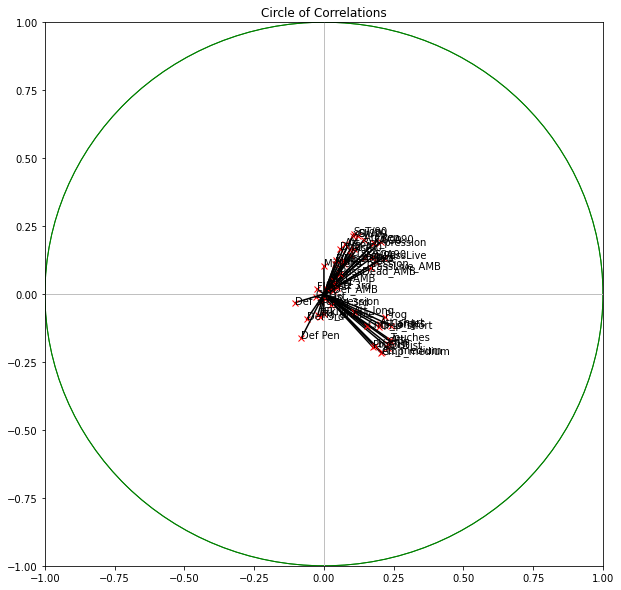

In [15]:
coef = np.transpose(pca.components_)
cols = ['y'+str(x+1) for x in range(2)]

pc_infos = pd.DataFrame(coef,columns=cols ,index=data_fbref_ok_flt.iloc[:,1:].columns)

plt.Circle((0,0),radius=10, color='g', fill=False)
circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
# Ajouter les axes et donner la limite pour chaque axe
fig, axes= plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
fig.gca().add_artist(circle1)
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
axes.add_artist(circle1)
# Affichage de chaque variable explicative dans la cercle
for idx in range(len(pc_infos["y1"])):
    x = pc_infos["y1"][idx]
    y = pc_infos["y2"][idx]
    plt.plot([0.0,x],[0.0,y],'k-')
    plt.plot(x, y, 'rx')
    plt.annotate(pc_infos.index[idx], xy=(x,y))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.title("Circle of Correlations")


In [16]:
import matplotlib.colors as colors
from matplotlib.cm import bwr as cmap
import matplotlib.patches as mpatches

def print_top_comp(components, feature_names, n_top_comp):
    taille=feature_names.shape[0]
    seuil=1/np.sqrt(taille)
    for comp_idx, topic in enumerate(components):
        Y=np.abs(topic)
        feature_pos=feature_names[topic>seuil]
        feature_neg=feature_names[topic<=-seuil]
        n_top_comp_pos=min(n_top_comp,feature_pos.shape[0])
        n_top_comp_neg=min(n_top_comp,feature_neg.shape[0])


        feature_pos=feature_names[topic.argsort()[::-1][:n_top_comp_pos]]
        feature_neg=feature_names[topic.argsort()[:n_top_comp_neg]]
        fea=np.concatenate((feature_pos,feature_neg))
        com_pos=np.sort(topic)[::-1][:n_top_comp_pos]
        com_neg=np.sort(topic)[:n_top_comp_neg]
        com=np.concatenate((com_pos,com_neg))

                
        c_normal = colors.PowerNorm(1,vmin=min(com),vmax=max(com))
        _COLORS = cmap(c_normal(com))

      
        components = pd.DataFrame(np.array(com),index =fea) 
        fig, ax = plt.subplots(figsize = (5,3))
        # Plot the feature weights as a function of the components
        components.plot(ax = ax, kind = 'bar',align = "center", color=_COLORS)
        #plt.xlabel("Dimension #%d " % comp_idx)
        ax.set_ylabel("Feature Weights") 
        red_patch = mpatches.Patch(color='red', label="Variable-%d " % (comp_idx+1))
        ax.legend(handles=[red_patch])
        plt.show()

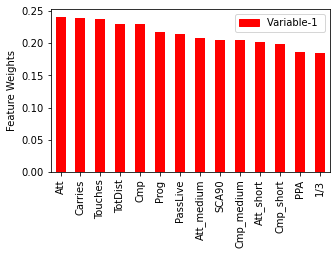

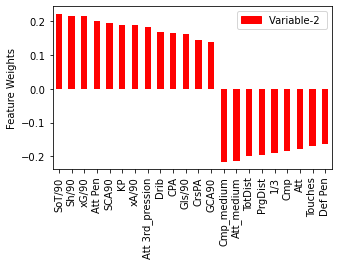

In [17]:
print_top_comp(pca.components_,data_fbref_ok_flt.columns[1:],14)

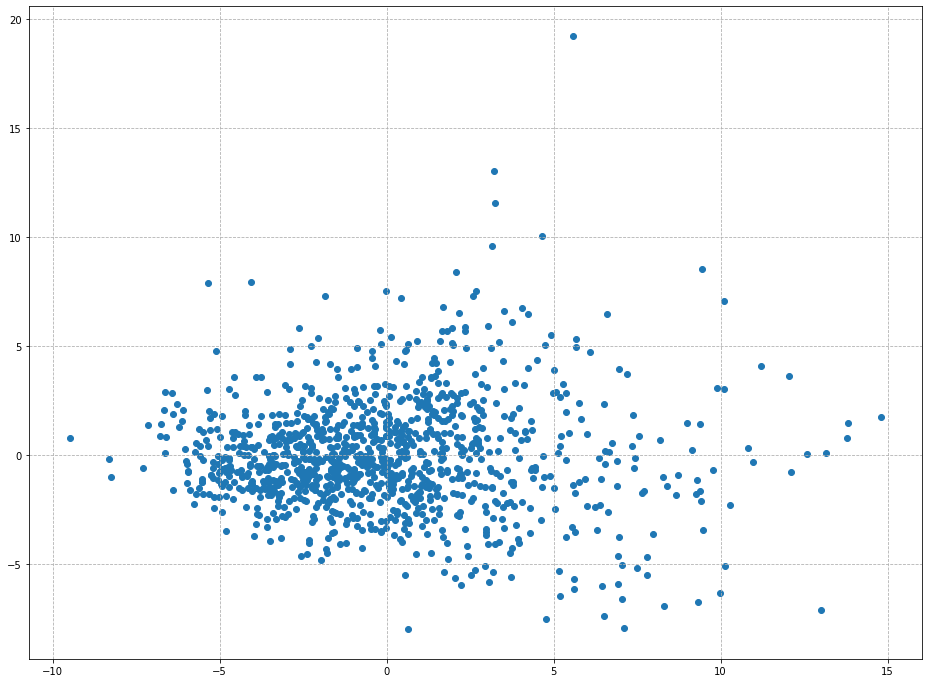

In [18]:
import matplotlib
plt.figure(figsize=(16,12))
plt.grid(True,which="both", linestyle='--')
plt.scatter(X_pca[:, 0], X_pca[:, 1])
#for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    #plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

plt.show()

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
for i in np.arange(2, 10):
    KM = KMeans(n_clusters=i)
    KM.fit(X_pca)
    clustering=KM.labels_
    score=silhouette_score(X_pca, clustering,metric='euclidean')
    print('La silhouette index pour {0:d} classes est {1:3f}'.format(i,score))
    print()

La silhouette index pour 2 classes est 0.394199

La silhouette index pour 3 classes est 0.381089

La silhouette index pour 4 classes est 0.356943

La silhouette index pour 5 classes est 0.319888

La silhouette index pour 6 classes est 0.313863

La silhouette index pour 7 classes est 0.337303

La silhouette index pour 8 classes est 0.321866

La silhouette index pour 9 classes est 0.319578



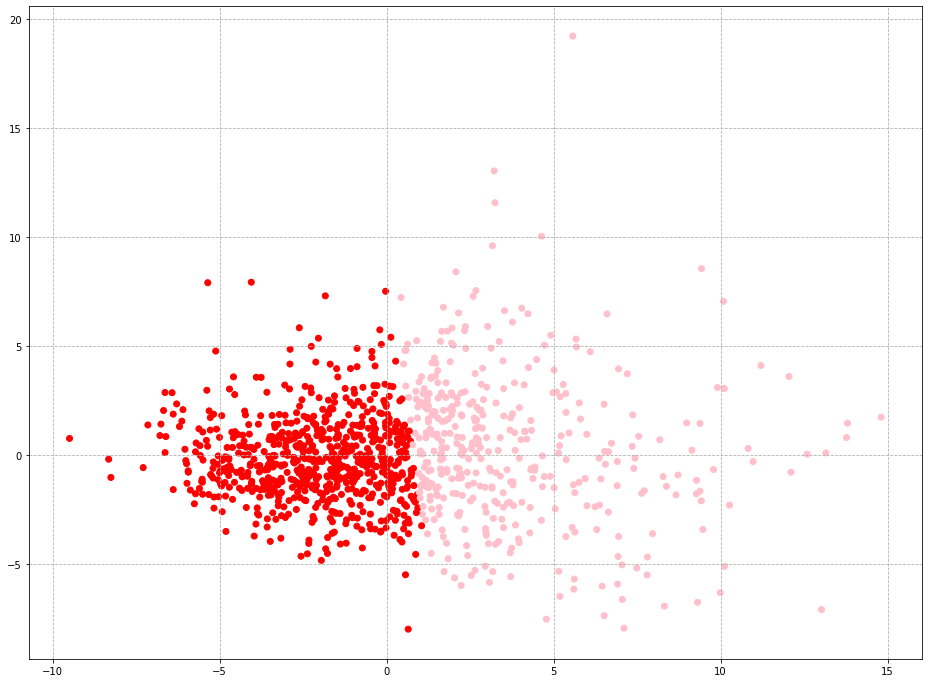

In [21]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_pca)
clustering=kmeans.labels_
colors = ['red','yellow','blue','pink']
plt.figure(figsize=(16,12))
plt.grid(True,which="both", linestyle='--')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
#for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    #plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering
liste=['complete','single','ward']
for j in liste:
    for i in np.arange(2, 10):
        CAH=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage=j) #complete ward
        CAH.fit(X_pca)
        clustering=CAH.labels_
        score=silhouette_score(X_pca, clustering,metric='euclidean')
        print('La silhouette index pour {0:d} classes est {1:3f} : {2}'.format(i,score,j))
        print()

La silhouette index pour 2 classes est 0.346652 : complete

La silhouette index pour 3 classes est 0.393878 : complete

La silhouette index pour 4 classes est 0.382812 : complete

La silhouette index pour 5 classes est 0.249174 : complete

La silhouette index pour 6 classes est 0.242977 : complete

La silhouette index pour 7 classes est 0.234280 : complete

La silhouette index pour 8 classes est 0.217728 : complete

La silhouette index pour 9 classes est 0.280568 : complete

La silhouette index pour 2 classes est 0.730280 : single

La silhouette index pour 3 classes est 0.559570 : single

La silhouette index pour 4 classes est 0.534419 : single

La silhouette index pour 5 classes est 0.323461 : single

La silhouette index pour 6 classes est 0.256377 : single

La silhouette index pour 7 classes est 0.258470 : single

La silhouette index pour 8 classes est 0.249146 : single

La silhouette index pour 9 classes est 0.192415 : single

La silhouette index pour 2 classes est 0.360042 : ward



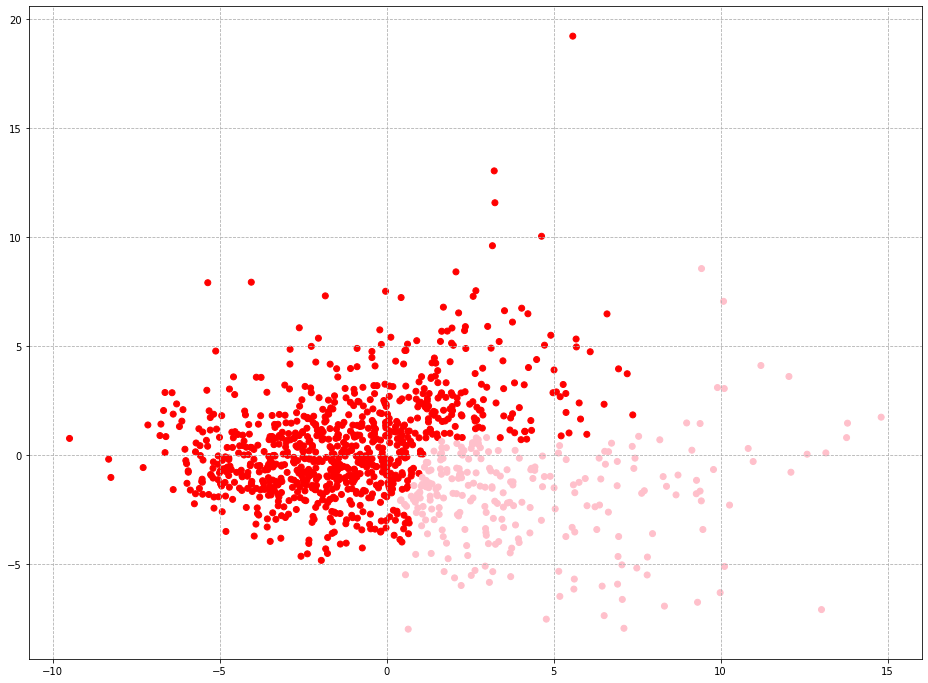

In [24]:
plt.figure(figsize=(16,12))
plt.grid(True,which="both", linestyle='--')
CAH=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward') #complete ward
CAH.fit(X_pca)
clustering=CAH.labels_

colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
#for label, x, y in zip(labels_startups, X_pca_startups[:, 0], X_pca_startups[:, 1]):
    #plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [ ]:
data_final = pd.DataFrame(np.concatenate((X_new,km.labels_.reshape((-1,1))),axis=1),columns=name)